## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)


<a id='intro'></a>
### Introduction

In this project I will analyze the result of an A/B test run by an e-commerce website. I will try to help the company to understand if they should implement the new page, keep the old page or run the experiment longer to make their decision.





<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# I will import these libraries that will help me in this project:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

`1.` Now, i will read in the `ab_data.csv` data. then Store it in `df`. 

a. Read in the dataset and take a look at it:

In [2]:
df = pd.read_csv('ab_data.csv')

# see the first the 5 rows to explore data
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


#### - I can see we are dealing with categorical values.

b.find the number of rows in the dataset.

In [3]:
# I used the info method to see the columns type , how many rows there and if there are missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


#### - we have 294478 rows and there are no missing values.

c. The number of unique users in the dataset.

In [4]:
# this method will return the number of rows with unique user id :
df['user_id'].nunique()

290584

#### - the number of unique users in the dataset is 290584.

d. The proportion of users converted.

In [5]:
# converted_proprtion = (rows that converted ) / (all rows)
converted_proprtion = df[df['converted'] == 1]['user_id'].count() / df['user_id'].count()

converted_proprtion

0.11965919355605512

#### -The proportion of users converted 0.1196

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# new_page is data frame that contain all new page rows
new_page = df[df['landing_page'] == 'new_page']

# treatment is data frame that contain all treatment rows
treatment = df[df['group'] == 'treatment']

# here I filtered  new_page so it contains only control rows without treatment
new_page = new_page[new_page['group'] != 'treatment']['user_id'].count()

# here i filtered  treatment so it contains only old_page rows without new_page
treatment = treatment[treatment['landing_page'] != 'new_page']['user_id'].count()

# add them to know how many times new_page and treatment don’t match
new_page + treatment

3893

#### - The number of times the `new_page` and `treatment` don't match is 3893

f. Do any of the rows have missing values?

In [7]:
# lets check agian : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


#### - we have no  missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. Now I will create a new dataset that meets the specifications treatment match with new_page and control matsh with old_page 
then Store new dataframe in **df2**.

In [8]:
# here I will copy df into df2 to avoid slicing warnings form Jupyter 
df2 = df.copy()

In [9]:
# I filtered the df2 to contain  treatment and new_page row or control and old_page so we ignore rows that don’t match.
df2 = df2[(df['group'] == 'treatment') & (df2['landing_page'] == 'new_page') | (df2['group'] == 'control') & (df2['landing_page'] == 'old_page')]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

#### - we got zero so it seems that it works well.

`3.` Using **df2** to answer below questions.

a. How many unique **user_id**s are in **df2**?

In [11]:
# this method will return the number of rows with unique user id :
df2['user_id'].nunique()

290584

#### - there are 290584 unique **user_id**s are in **df2**

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# this data frame will take the one row that duplicated method return it as true:
duplicated_user_id = df2[df2['user_id'].duplicated()]
duplicated_user_id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

 -  (user_id = 773192 , group = treatment , landing_page = new_page , converted = 0 )

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# this method will drop the row with index 2893 (the duplicated row in our data)
df2.drop(index=2893 , inplace=True)

# here I will check to make sure
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below 

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# I will take the sum of converted  (true ones) and divide it by the total number of converted
prob_converting = df['converted'].sum() / df['converted'].count() 
prob_converting

0.11965919355605512

#### - p(converted) 0.1196 = 11.96%

#### before answering the question I noticed that the next two question have same answering format so will use function to avoid code replications. 
- this function will calcualte  p( converted | group_type ) the parmaters will be cloumn1 with type1 and cloumn2 with type2.

In [15]:
def probability (group_type):
    return df2[df2['group'] == group_type]['converted'].sum() / df2[df2['group'] == group_type]['converted'].count()

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# this function will return the p( converted | control )
probability('control')

0.1203863045004612

#### - p( converted | control ) = 0.1203 = 12.03 %

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# this function will return the p( converted | treatment )
probability('treatment')

0.11880806551510564

#### - p( converted | treatment ) = 0.1188 = 11.88 %

d. What is the probability that an individual received the new page?

In [18]:
# I will divide the number of total new page by all pages.
df2[df2['landing_page'] == 'new_page' ]['user_id'].count()/df2['landing_page'].count()

0.5000619442226688

#### - p (new_page) = 0.5 = 50 %

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**my answer:**
if we gather all the probability that we calculated: 
-  p(converted) 0.1196 = 11.96%
-  p( converted | control ) = 0.1203 = 12.03 %
-  p( converted | treatment ) = 0.1188 = 11.88 %
-  p (new_page) = 0.5 = 50 %

##### I would say since we have only 50% of individuals received the new page, running the experiment for longer time needed in order to make a decision.

<a id='ab_test'></a>
### Part II - A/B Test


`1.` now I will assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, my null and alternative hypotheses be:  

**$H_{0}$** : **$p_{old}$** >= **$p_{new}$** ,  
**$H_{1}$** : **$p_{old}$** < **$p_{new}$**

`2.` I will assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, I will assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

- i will use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

- i will perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
# I assumed that Pnew have "true" success rates equal to the converted success rate regardless of page

# prob_converting is the converted success rate rate that I calculated earlier 
p_new = prob_converting
p_new

0.11965919355605512

#### **conversion rate** for $p_{new}$ under the null = 0.1196

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
# i assumed that Pold have "true" success rates equal to the converted success rate regardless of page

# prob_converting is the converted success rate rate that I calculated earlier 
p_old = prob_converting
p_old

0.11965919355605512

#### **conversion rate** for $p_{old}$ under the null = 0.1196

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
# here I create n new data frame that contain all treatment rows 
n_new = df2[(df2['group'] == 'treatment')]['user_id'].nunique()
n_new

145310

#### the number of individuals in the treatment group $n_{new}$ = 145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
# here I create n new data frame that contain all control rows 
n_old = df2[df2['group'] == 'control']['user_id'].nunique()
n_old

145274

#### the number of individuals in the treatment group $n_{new}$ = 145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# this function will generate random array of values 0 or 1 with size of n_new and probability of p_new
new_page_converted = np.random.choice([0,1],n_new, p_new)
new_page_converted

array([0, 0, 1, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# this function will generate random array of values 0 or 1 with size of n_old and probability of p_old
old_page_converted = np.random.choice([0,1],n_old, p_old)
old_page_converted

array([1, 0, 1, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# here I subtracted the mean of each simulated array to find the difference 
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.0012183549211989275

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
# I will use the bootstrapping in order to create sampling difference in proportions:

# this list will contain all different in proportions 
p_diffs = []
#
# for loop of size 10000 each time we will simulate new random array same as above then store it in p_diffs list: 
#for i in range(10000):
#    new_page_converted = np.random.choice([0,1],n_new, p_new)
#    old_page_converted = np.random.choice([0,1],n_old, p_old)
#    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
#
#after the loop ends i will convert the list into numpay array so i can implement numpy method later (.mean())   
#p_diffs = np.array(p_diffs)

In [27]:
# I will use the bluid-in numpy function binomial and it will gives me the same result above with way faster time
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected? 

- before i made the plot i will find the acual diffrente to provide it inside the plot:

In [28]:
# this new_diff data frame will contain the difference in converted in treatment group
new_diff = df2[(df2['converted'] == 1) & (df2['group'] == 'treatment')]['user_id'].count() / df2[df2['group'] == 'treatment']['user_id'].count()

# this old_diff data frame will contain the difference in converted in control group
old_diff = df2[(df2['converted'] == 1) & (df2['group'] == 'control')]['user_id'].count() / df2[df2['group'] == 'control']['user_id'].count()

# I will subtract them to have actual difference in converted between treatment and control group.
actual_diff = new_diff - old_diff
actual_diff

-0.0015782389853555567

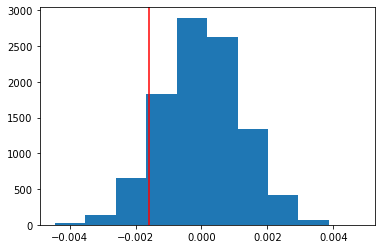

In [29]:
# here I will plot the sampling distribution
plt.hist(p_diffs);

# also plot line for observed statistic
plt.axvline(x=actual_diff , color = 'red');

- the plot seems as normal disturbation and the actual diffrece is below the mean

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# here I will compute the p value
(p_diffs > actual_diff).mean()

0.9051

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**my answer:**
in part j we find the p value and this value will be compared to the error type 1(5%) to determine whether we reject the null hypothesis or fail to reject the null hypothesis: 
- p-value <= type error 1 in order to reject the null hypothesis
   
######  but we have 0.9051 > 0.05    so we fail to reject the null hypothesis. 


l. We could also use a built-in to achieve similar results.Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

In [32]:
import statsmodels.api as sm

# number of conversions for old pages
convert_old = df2[(df2['group'] == 'control')&(df2['converted'] == 1)]['user_id'].nunique()

# number of conversions for new pages
convert_new = df2[(df2['group'] == 'treatment')&(df2['converted'] == 1)]['user_id'].nunique()

#number of individuals who received old page
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].count()

#number of individuals who received new page
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].count()

m. Now I will use `stats.proportions_ztest` to compute your test statistic and p-value.

In [33]:
(z_score , p_value) = sm.stats.proportions_ztest([convert_new,convert_old] , [n_new,n_old] , alternative='larger')
(z_score , p_value)

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- z-score gives us how the standard deviations far from the mean witch in our case it is below the mean (negative).  
- p-value gives us how data could have occurred under the null hypothesis in our case it support what we find witch fail to     reject the null hypothesis.

- yes, they agree with the our findings that we reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- I will performing logistic regression since we want to predict two chances conversion or no conversion.

b. The goal is to use **statsmodels** to fit the logistic regression model to see if there is a significant difference in conversion based on which page a customer receives. However, first I need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# I will create intercept column to use it in statsmodels
df2['intercept'] = 1

In [35]:
# get_dummies method will convert the Categorical values into (1,0) to be able to use it inside the statsmodels
# 1 will be for the treatment
# 0 will be for the control

df2['ab_page']= pd.get_dummies(df2['group'])['treatment']

c. I will use **statsmodels** to instantiate the logistic regression model, then fit the model using the two columns I created in part **b.** to predict whether or not an individual converts. 

In [36]:
# I used the statsmodels to predict the conversion 
lm = sm.Logit(df2['converted'] , df2[['intercept' , 'ab_page']])
result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
# this will give me the summary that help me to determine  the p-value associated with ab_page
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        09:57:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

- the p-value associated with ab_page is 0.190 
- it is different form what we found in part 2 cause it determine if there     is a difference in conversion based on which page a customer receives   where the part 2 determine if there is a higher conversion based of the new and old pages


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- we need to include other factors such as countries since in previous part we include only the page factor to predict so we can get more accurate result whether we reject the null hypothesis or not.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. I will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.


In [38]:
# read the countries file 
countries = pd.read_csv('countries.csv')
countries.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
# I will see some information about the dataset
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  290584 non-null  int64 
 1   country  290584 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [40]:
# now I will create a new data frame joined_df that contain the two data frames df2 and countries the will be merged on user id

joined_df = df2.merge(countries , on=['user_id'] , how='inner')
joined_df.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US


In [41]:
# I will use get dummies to convert the categorical data so I can use them in model

joined_df[['CA', 'UK', 'US']] = pd.get_dummies(joined_df['country'])
joined_df.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


h. Though I have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.I will create the necessary additional columns, and fit the new model.  

I will Provide the summary results, and my conclusions based on the results.

In [42]:
# I will use the statsmodels to predict the conversion and show the summary

joined_df['intercept'] = 1
lm = sm.Logit(joined_df['converted'], joined_df[['intercept', 'ab_page', 'US', 'UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:               2.323e-05
Time:                        09:57:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""


#### - it seems with including the country factor in conversion form new and old pages didn’t affect them.

#### - the p-value associated with ab_page doesn’t change  from the last model = 0.191 and it is bigger than type 1 error 0.05 so we fail to reject the  null hypothesis.

#### to find if there is an interaction between page and country to see if there significant effects on conversion. so you need to create additional interaction columns:

In [44]:
joined_df['US_ab_page'] = joined_df['US'] * joined_df['ab_page']
joined_df['CA_ab_page'] = joined_df['CA'] * joined_df['ab_page']

In [45]:
# fit the two new cloumns in the model 
lm = sm.Logit(joined_df['converted'], joined_df[['intercept', 'ab_page', 'US', 'UK' , 'US_ab_page' , 'CA_ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:               3.482e-05
Time:                        10:02:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

- since all factors except (intercept) have no significant effects on conversion (p-value > 0.05) I can say that countries have no significant effects on conversion.

<a id='conclusions'></a>

# Conclusions:




#### Part 1 : 
###### given the probability that we found specially the probability of individuals received a new page, we need to run the experiment for   longer time in order to make a decision.
-  p(converted) 0.1196 = 11.96%
-  p( converted | control ) = 0.1203 = 12.03 %
-  p( converted | treatment ) = 0.1188 = 11.88 %
-  p (new_page) = 0.5 = 50 %

#### Part 2 :  
######  bead on the p-value we found and the given type of error 1 we fail to reject the null hypothesis 
- p-value <= type error 1 in order to reject the null hypothesis 
######  but we have 0.9051 >  0.05   so we fail to reject the null hypothesis. 

#### Part III - A regression approach : 
- the p-value associated with ab_page is 0.190 
- even with including other factor (countries) the p-value associated with ab_page doesnt got affected.
- the p-value associated with ab_page doesn’t change  from the last model = 0.191 and it is bigger than type 1 error 0.05 so we **fail to reject the  null hypothesis**.
- countries have no significant effects on conversion.

#### Finally,
my decision regarding this A/B test, we fail to reject the null hypothesis so I recommend the company to keep the old page and dont switch to the new one.

#### Thank you